In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [ ]:
import pandas as pd

#initial setup

In [ ]:
X = pd.read_csv("filled_circle_dataset.csv", header=None)

In [ ]:
X.head()

,0,1
0,-10.963362,3.218795
1,-16.389547,2.120770
2,14.821133,-4.845538
3,-3.900191,-13.913023
4,-16.662654,0.440439


In [ ]:
X[0]

0      -10.963362
1      -16.389547
2       14.821133
3       -3.900191
4      -16.662654
          ...    
1495    16.890662
1496    29.408536
1497    24.609160
1498    17.061168
1499    28.016728
Name: 0, Length: 1500, dtype: float64

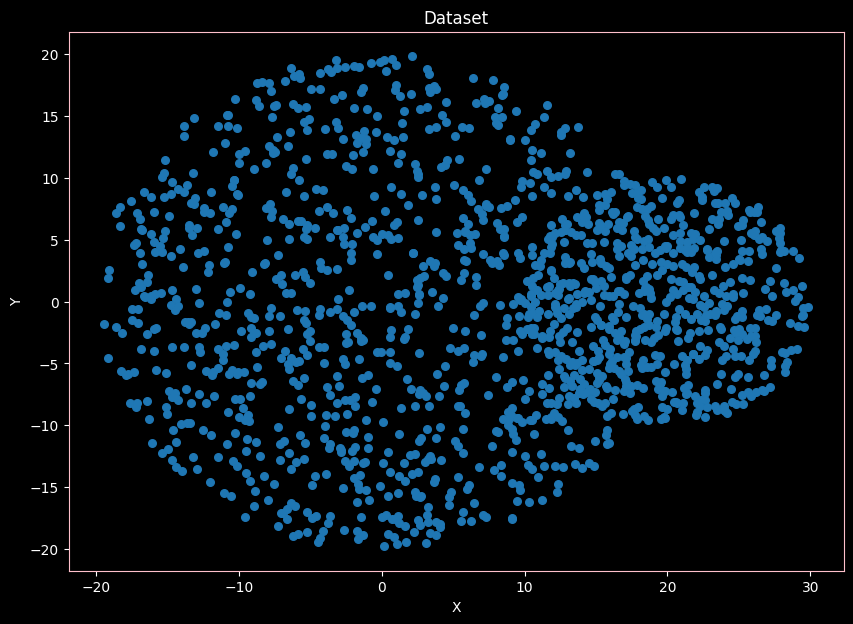

In [ ]:
# Plot the dataset
fig, ax = plt.subplots(figsize=(10, 7))
# Set the figure background color
fig.set_facecolor('black')

# Set the axes background color
ax.set_facecolor('black')

plt.scatter(X[0], X[1], s=30)
plt.xlabel('X', color="white")
plt.ylabel('Y', color="white")

# Set the spine colors
ax.spines['left'].set_color('pink')
ax.spines['right'].set_color('pink')
ax.spines['top'].set_color('pink')
ax.spines['bottom'].set_color('pink')

# Set tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.title('Dataset', color='white')
plt.show()

#DBSCAN

In [ ]:
# Configure DBSCAN parameters
eps = 2.5  # Radius of neighborhood
min_samples = 15  # Minimum number of samples in a neighborhood to be considered a core point

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

In [ ]:
print(clusters)

[0 0 0 ... 0 0 0]


In [ ]:
X['cluster'] = clusters

In [ ]:
X.head()

,0,1
0,-10.963362,3.218795
1,-16.389547,2.120770
2,14.821133,-4.845538
3,-3.900191,-13.913023
4,-16.662654,0.440439


<ipython-input-37-5c115a3a6577>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[0], cluster_points[1], s=30, c=color, label=f'Cluster {cluster}')


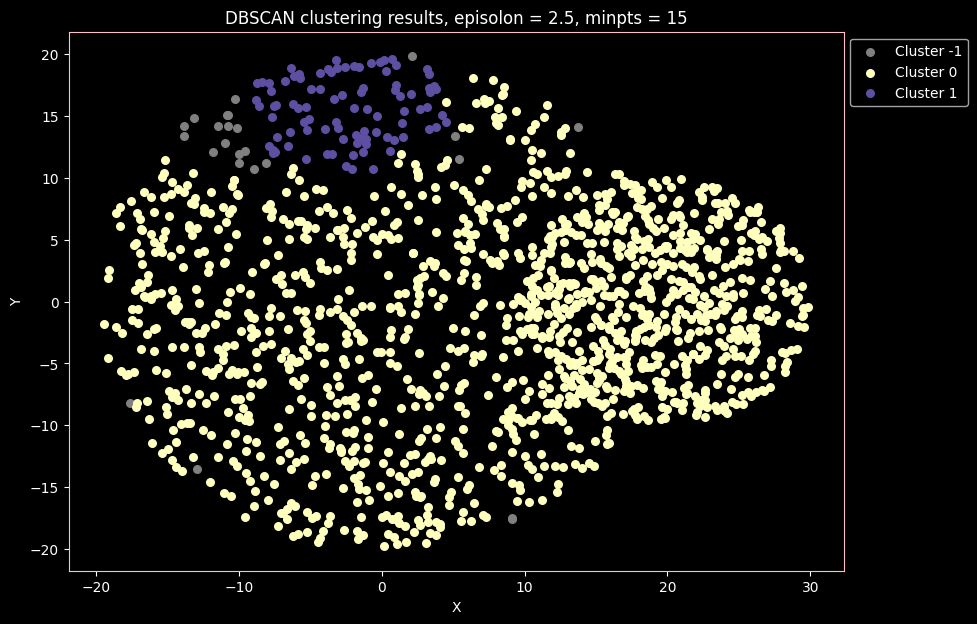

In [ ]:
# Plot the results
unique_clusters = np.unique(clusters)
fig, ax = plt.subplots(figsize=(10, 7))

# Set the figure background color
fig.set_facecolor('black')

# Set the axes background color
ax.set_facecolor('black')

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Noise points are assigned -1
        color = 'gray'

    # Find the points in the current cluster
    cluster_points = X[clusters == cluster]

    # Plot the points
    plt.scatter(cluster_points[0], cluster_points[1], s=30, c=color, label=f'Cluster {cluster}')

plt.xlabel('X', color='white')
plt.ylabel('Y', color='white')

# Set the spine colors
ax.spines['left'].set_color('pink')
ax.spines['right'].set_color('pink')
ax.spines['top'].set_color('pink')
ax.spines['bottom'].set_color('pink')

# Set tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

legend.get_frame().set_facecolor('black')
plt.setp(legend.get_texts(), color='white')

plt.title('DBSCAN clustering results, episolon = 2.5, minpts = 15', color='white')
plt.show()



#Weighted DBSCAN

##setup

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Parameters
epsilon = 2

In [ ]:
del df

In [ ]:
df = X

In [ ]:
df = df.drop('cluster', axis=1)

In [ ]:
df.head()

,0,1
0,-10.963362,3.218795
1,-16.389547,2.120770
2,14.821133,-4.845538
3,-3.900191,-13.913023
4,-16.662654,0.440439


##finding neighbors

In [ ]:
# Fit NearestNeighbors model to the dataset
nn = NearestNeighbors(radius=epsilon)
nn.fit(df)

NearestNeighbors(radius=2)

##assign weights

In [ ]:
# Compute neighborhood counts for each point
neighbors = nn.radius_neighbors(df, return_distance=False)
df['neighborhood_count'] = [len(n) for n in neighbors]

In [ ]:
df.describe()

,0,1,neighborhood_count
count,1500.000000,1500.000000,1500.000000
mean,6.825821,-0.498762,16.374667
std,12.678148,8.698011,8.305356
min,-19.483188,-19.787773,2.000000
25%,-3.627448,-6.868552,10.000000
50%,8.551203,-0.607209,14.000000
75%,17.154246,5.683125,23.000000
max,29.863573,19.846104,41.000000


##assign weights

In [ ]:
# Compute the average neighborhood count for each point's epsilon neighborhood (excluding the point itself)
df['average_neighbor_count'] = [
    (df.loc[neighbors_i, 'neighborhood_count'].sum() - neighborhood_count) / max(len(neighbors_i) - 1, 1)
    for neighbors_i, neighborhood_count in zip(neighbors, df['neighborhood_count'])
]

In [ ]:
df.head()

,0,1,neighborhood_count,average_neighbor_count
0,-10.963362,3.218795,6,8.200000
1,-16.389547,2.120770,14,14.230769
2,14.821133,-4.845538,33,33.250000
3,-3.900191,-13.913023,8,10.714286
4,-16.662654,0.440439,13,14.250000


In [ ]:
# Compute the average neighborhood count for each point's epsilon neighborhood (including the point itself)
df['average_neighbor_count_i'] = [
    (df.loc[neighbors_i, 'neighborhood_count'].sum() + neighborhood_count) / (len(neighbors_i) + 1)
    for neighbors_i, neighborhood_count in zip(neighbors, df['neighborhood_count'])
]

In [ ]:
df.head()

,0,1,neighborhood_count,average_neighbor_count,average_neighbor_count_i
0,-10.963362,3.218795,6,8.200000,7.571429
1,-16.389547,2.120770,14,14.230769,14.200000
2,14.821133,-4.845538,33,33.250000,33.235294
3,-3.900191,-13.913023,8,10.714286,10.111111
4,-16.662654,0.440439,13,14.250000,14.071429


##finding core points

In [ ]:
# Identify core points
df['is_core'] = df['neighborhood_count'] > df['average_neighbor_count']

In [ ]:
# Identify core points
df['is_core_i'] = df['neighborhood_count'] > df['average_neighbor_count_i']

In [ ]:
df.sum()

0                           10238.730940
1                            -748.142387
neighborhood_count          24562.000000
average_neighbor_count      25363.529721
average_neighbor_count_i    25145.710199
is_core                       606.000000
is_core_i                     606.000000
dtype: float64

##finding border points

In [ ]:
# Function to check if a point is a border point
def is_border_point(index, neighbors, core_points):
    for n in neighbors[index]:
        if n in core_points:
            return True
    return False

##finding noise points

In [ ]:
# Identify border points and noise points
core_points = set(df[df['is_core']].index)
df['is_border'] = [is_border_point(i, neighbors, core_points) if i not in core_points else False for i, row in df.iterrows()]
df['is_noise'] = ~(df['is_core'] | df['is_border'])

In [ ]:
# Find neighbors of a given point
def find_neighbors(index, neighbors):
    return neighbors[index]

In [ ]:
df.sum()

0                           10238.730940
1                            -748.142387
neighborhood_count          24562.000000
average_neighbor_count      25363.529721
average_neighbor_count_i    25145.710199
is_core                       606.000000
is_core_i                     606.000000
is_border                     869.000000
is_noise                       25.000000
dtype: float64

##forming clusters

In [ ]:
# Form clusters using core points
clusters = []
visited = set()
for i, row in df.iterrows():
    if row['is_core'] and i not in visited:
        cluster = set([i])
        for j, row_j in df.iterrows():
            if row_j['is_core'] and j not in visited and j in find_neighbors(i, neighbors):
                cluster.add(j)
                visited.add(j)
        visited.add(i)
        clusters.append(cluster)

In [ ]:
len(clusters)

124

##merging clusters based on conditions

In [ ]:
# Merge clusters based on the conditions
def merge_clusters(clusters, similarity_threshold):
    merged = True
    while merged:
        merged = False
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for p1 in clusters[i]:
                    for p2 in clusters[j]:
                        if p1 in find_neighbors(p2, neighbors) and p2 in find_neighbors(p1, neighbors):
                            nc1 = df.loc[p1]['neighborhood_count']
                            nc2 = df.loc[p2]['neighborhood_count']
                            if abs(nc1 - nc2) <= similarity_threshold:
                                clusters[i] = clusters[i].union(clusters[j])
                                clusters.pop(j)
                                merged = True
                                break
                    if merged:
                        break
                if merged:
                    break

In [ ]:
# Merge clusters based on the conditions
merge_clusters(clusters, similarity_threshold=5)

In [ ]:
len(clusters)

21

In [ ]:
df.head()

,0,1,neighborhood_count,average_neighbor_count,average_neighbor_count_i,is_core,is_core_i,is_border,is_noise
0,-10.963362,3.218795,6,8.200000,7.571429,False,False,True,False
1,-16.389547,2.120770,14,14.230769,14.200000,False,False,True,False
2,14.821133,-4.845538,33,33.250000,33.235294,False,False,True,False
3,-3.900191,-13.913023,8,10.714286,10.111111,False,False,True,False
4,-16.662654,0.440439,13,14.250000,14.071429,False,False,True,False


##assigning border points into clusters

In [ ]:
# Assign cluster labels to the DataFrame
df['cluster'] = -1
for i, cluster in enumerate(clusters):
    for point in cluster:
        df.at[point, 'cluster'] = i

In [ ]:
# Find the nearest core point for each border point
border_points = df[df['is_border']]
for i, row in border_points.iterrows():
    distances, indices = nn.kneighbors([row[[0, 1]]], n_neighbors=1, return_distance=True)
    nearest_core_index = indices[0][0]
    nearest_core_row = df.loc[nearest_core_index]
    
    # Assign the border point to the nearest core point's cluster
    df.at[i, 'cluster'] = nearest_core_row['cluster']

In [ ]:
# Find the nearest core point within epsilon radius for each border point
border_points = df[df['is_border']]
for i, row in border_points.iterrows():
    # Get all the neighbors within the epsilon radius
    neighbors_indices = neighbors[i]
    
    # Filter only the core points within the epsilon radius
    core_neighbors = df.loc[neighbors_indices, [0, 1, 'cluster']][df['is_core'][neighbors_indices]]
    
    if not core_neighbors.empty:
        # Calculate the distances to the core neighbors
        distances = np.sqrt(np.sum((core_neighbors[[0, 1]] - row[[0, 1]])**2, axis=1))
        
        # Find the index of the nearest core neighbor
        nearest_core_index = core_neighbors.index[distances.argmin()]
        nearest_core_cluster = core_neighbors.loc[nearest_core_index]['cluster']
        
        # Assign the border point to the nearest core point's cluster
        df.at[i, 'cluster'] = nearest_core_cluster

In [ ]:
border_points.head()

,0,1,neighborhood_count,average_neighbor_count,average_neighbor_count_i,is_core,is_core_i,is_border,is_noise,cluster
0,-10.963362,3.218795,6,8.200000,7.571429,False,False,True,False,-1
1,-16.389547,2.120770,14,14.230769,14.200000,False,False,True,False,-1
2,14.821133,-4.845538,33,33.250000,33.235294,False,False,True,False,-1
3,-3.900191,-13.913023,8,10.714286,10.111111,False,False,True,False,-1
4,-16.662654,0.440439,13,14.250000,14.071429,False,False,True,False,-1


In [ ]:
df.sum()

0                           10238.730940
1                            -748.142387
neighborhood_count          24562.000000
average_neighbor_count      25363.529721
average_neighbor_count_i    25145.710199
is_core                       606.000000
is_core_i                     606.000000
is_border                     869.000000
is_noise                       25.000000
cluster                      5321.000000
dtype: float64

#visualizing clusters

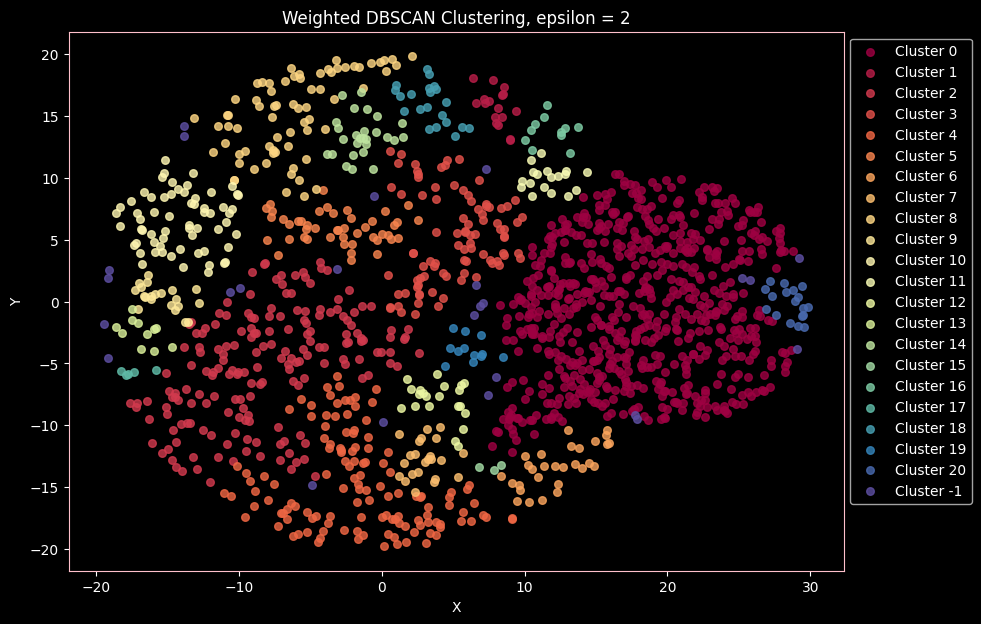

In [ ]:
# Visualize the clusters
fig, ax = plt.subplots(figsize=(10, 7))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(df['cluster']))))

for cluster, color in zip(set(df['cluster']), colors):
    cluster_points = df[df['cluster'] == cluster]
    ax.scatter(cluster_points[0], cluster_points[1], s=30, c=[color], label=f'Cluster {cluster}', alpha=0.8)

# Set the background color to black
ax.set_facecolor('black')
fig.set_facecolor('black')

# Set the text colors for better visibility on the black background
ax.set_xlabel('X', color='white')
ax.set_ylabel('Y', color='white')
ax.tick_params(colors='white')

# # Change the color of the frame (spines) to black
for spine in ax.spines.values():
    spine.set_color('pink')

# Place the legend outside the plot, to the right
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend.get_frame().set_facecolor('black')

# # Set the text color of all the legend entries to white
for text in legend.get_texts():
    text.set_color('white')

plt.title('Weighted DBSCAN Clustering, epsilon = 2', color='white')
plt.show()

#unimportant stuff

In [ ]:
# Filter DataFrame based on the condition x < 10
df_x_lt_10 = df[(df[0] < 10)]

# Calculate the average weighted_minpts for points where x < 10
avg_weighted_minpts_lt_10 = df_x_lt_10['weighted_minpts'].mean()

# Filter DataFrame based on the condition x >= 10
df_x_ge_10 = df[df[0] >= 10]

# Calculate the average weighted_minpts for points where x >= 10
avg_weighted_minpts_ge_10 = df_x_ge_10['weighted_minpts'].mean()

print(f"Average weighted_minpts for points where x < 10: {avg_weighted_minpts_lt_10}")
print(f"Average weighted_minpts for points where x >= 10: {avg_weighted_minpts_ge_10}")


Average weighted_minpts for points where x < 10: 5.39549436795995
Average weighted_minpts for points where x >= 10: 11.369472182596292


In [ ]:
df_x_lt_10.describe()

,0,1,neighborhood_count,weighted_minpts,cluster
count,799.000000,799.000000,799.000000,799.000000,799.000000
mean,-3.240352,-0.605641,10.790989,5.395494,59.747184
std,7.816642,10.496836,3.556930,1.778465,42.104610
min,-19.483188,-19.787773,2.000000,1.000000,0.000000
25%,-9.502807,-9.230291,8.000000,4.000000,26.000000
50%,-2.739851,-0.830435,11.000000,5.500000,51.000000
75%,3.131385,7.369593,13.000000,6.500000,84.000000
max,9.990463,19.846104,27.000000,13.500000,170.000000


In [ ]:
df_x_ge_10.describe()

,0,1,neighborhood_count,weighted_minpts,cluster
count,701.000000,701.000000,701.000000,701.000000,701.000000
mean,18.299247,-0.376940,22.738944,11.369472,107.760342
std,5.202260,6.031041,7.559216,3.779608,67.281219
min,10.032896,-16.198616,3.000000,1.500000,2.000000
25%,13.781507,-5.014542,18.000000,9.000000,40.000000
50%,17.794854,-0.460907,23.000000,11.500000,117.000000
75%,22.391468,4.322222,28.000000,14.000000,176.000000
max,29.863573,15.927702,41.000000,20.500000,200.000000


In [ ]:
# Filter DataFrame based on the condition 9 <= x < 10
df_x_between_9_and_10 = df[(df[0] >= 9) & (df[0] < 10)]

In [ ]:
df_x_between_9_and_10.describe()

,0,1,neighborhood_count,weighted_minpts,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,9.469178,-3.880054,14.685714,7.342857,0.257143
std,0.279457,9.137683,6.037975,3.018988,1.521278
min,9.043238,-17.572754,5.000000,2.500000,0.000000
25%,9.155449,-10.533392,10.000000,5.000000,0.000000
50%,9.508547,-3.983089,15.000000,7.500000,0.000000
75%,9.672328,1.972737,20.000000,10.000000,0.000000
max,9.990463,15.446195,27.000000,13.500000,9.000000


Text(0.5, 0, 'Neighborhood Count')

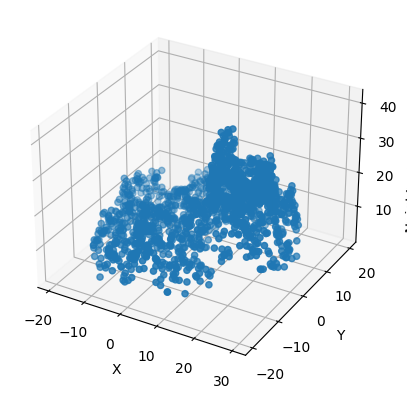

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = df[0]
y_vals = df[1]
z_vals = df['neighborhood_count']

ax.scatter(x_vals, y_vals, z_vals)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Neighborhood Count')

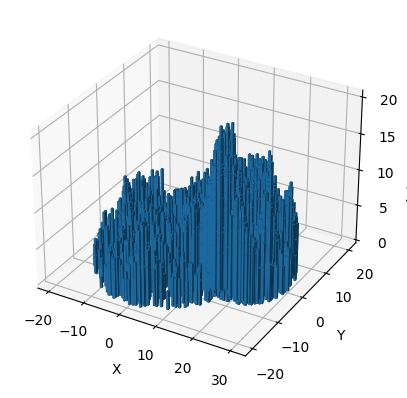

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = df[0]
y_vals = df[1]
z_vals = df['weighted_minpts']

bottom = np.zeros_like(z_vals)
width = 0.5

ax.bar3d(x_vals, y_vals, bottom, width, width, z_vals, shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('weighted_minpts')

plt.show()